# Assignment 7

*(Due Saturday, November 2, 2019 at noon.)*

In [1]:
import numpy as np
import pandas as pd

1) Load either your dataset, `brfss`, or `nhis` and create at least three derived fields from the data there. Ideally, these will be fields you'll need for your final project.

In [2]:
proj=pd.read_excel('../dataset/CSC_project.xlsx')
proj.head()

,Code,GENDER,ETHNICITY,FIRST_GEN,HOME_CITY,HOME_STATE,PELL_IND,TD_IND,FERPA_FLG,PRIMARY_PROGRAM,...,CUM_GPA,SAT_SCORE,ACT_SCORE,HS_CONV_GPA,STEM_CRSE_COUNT_TERM,STEM_CRSE_COUNT_TOTAL,Exam One,Diagnostic Exam,First Module,Subject Enhancement Project
0,100,F,2+ Races,Y,Seekonk,MA,N,N,N,UC_PH,...,0.00,1110,0,3.1,3,3,48.0,70,5.0,50
1,101,M,2+ Races,Y,Exeter,RI,Y,N,N,UC_EL,...,0.00,0,0,NaN,1,1,50.0,75,6.0,50
2,102,M,2+ Races,N,Pawtucket,RI,Y,Y,N,UC_AS,...,1.93,0,0,NaN,1,1,13.0,50,0.0,0
3,103,F,2+ Races,Y,Cranston,RI,N,N,N,UC_EL,...,4.00,1140,0,4.1,2,2,92.0,90,12.0,50
4,104,M,2+ Races,N,Holbrook,NY,N,N,N,UC_EL,...,0.00,1020,0,NaN,2,2,40.0,60,0.0,0


In [17]:
proj_pd=pd.DataFrame(proj)
print (proj_pd.columns)
proj.rename(columns= {'Exam One':'Exam1','Diagnostic Exam ':'DigEx','First Module ':'Mod1'},inplace=True)
print (proj_pd.columns)

Index(['Code', 'GENDER', 'ETHNICITY', 'FIRST_GEN', 'HOME_CITY', 'HOME_STATE',
       'PELL_IND', 'TD_IND', 'FERPA_FLG', 'PRIMARY_PROGRAM', 'PRIM_PROG_DESCR',
       'ACAD_PLAN1', 'ACAD_PLAN1_DESCR', 'ACAD_LEVEL', 'UNITS_TAKING',
       'TOT_CUM_CREDITS', 'CUM_GPA', 'SAT_SCORE', 'ACT_SCORE', 'HS_CONV_GPA',
       'STEM_CRSE_COUNT_TERM', 'STEM_CRSE_COUNT_TOTAL', 'Exam1', 'DigEx',
       'Mod1', 'Subject Enhancement Project'],
      dtype='object')
Index(['Code', 'GENDER', 'ETHNICITY', 'FIRST_GEN', 'HOME_CITY', 'HOME_STATE',
       'PELL_IND', 'TD_IND', 'FERPA_FLG', 'PRIMARY_PROGRAM', 'PRIM_PROG_DESCR',
       'ACAD_PLAN1', 'ACAD_PLAN1_DESCR', 'ACAD_LEVEL', 'UNITS_TAKING',
       'TOT_CUM_CREDITS', 'CUM_GPA', 'SAT_SCORE', 'ACT_SCORE', 'HS_CONV_GPA',
       'STEM_CRSE_COUNT_TERM', 'STEM_CRSE_COUNT_TOTAL', 'Exam1', 'DigEx',
       'Mod1', 'Subject Enhancement Project'],
      dtype='object')


In [18]:
proj_pd.dropna(subset=['Exam1'], inplace=True)

In [7]:
proj_pd.head()

,Code,GENDER,ETHNICITY,FIRST_GEN,HOME_CITY,HOME_STATE,PELL_IND,TD_IND,FERPA_FLG,PRIMARY_PROGRAM,...,CUM_GPA,SAT_SCORE,ACT_SCORE,HS_CONV_GPA,STEM_CRSE_COUNT_TERM,STEM_CRSE_COUNT_TOTAL,Exam1,DigEx,Mod1,Subject Enhancement Project
0,100,F,2+ Races,Y,Seekonk,MA,N,N,N,UC_PH,...,0.00,1110,0,3.1,3,3,48.0,70,5.0,50
1,101,M,2+ Races,Y,Exeter,RI,Y,N,N,UC_EL,...,0.00,0,0,NaN,1,1,50.0,75,6.0,50
2,102,M,2+ Races,N,Pawtucket,RI,Y,Y,N,UC_AS,...,1.93,0,0,NaN,1,1,13.0,50,0.0,0
3,103,F,2+ Races,Y,Cranston,RI,N,N,N,UC_EL,...,4.00,1140,0,4.1,2,2,92.0,90,12.0,50
4,104,M,2+ Races,N,Holbrook,NY,N,N,N,UC_EL,...,0.00,1020,0,NaN,2,2,40.0,60,0.0,0


In [25]:
from statsmodels.formula.api import ols 
lm = ols('Exam1 ~ DigEx + C(GENDER) + C(FIRST_GEN)', data=proj_pd)
lm1= lm.fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Exam1   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     22.25
Date:                Sat, 14 Dec 2019   Prob (F-statistic):           2.72e-11
Time:                        13:08:58   Log-Likelihood:                -472.52
No. Observations:                 112   AIC:                             953.0
Df Residuals:                     108   BIC:                             963.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            28.1963      5.616      5.021      0.000      17.065      39.328
C(GENDER)[T.M]       -2.7391      3.352     -0.817      0.416      -9.384       3.905
C(FIRST_GEN)[T.Y]    -2.2303      3.443     -0.648      0.518      -9.054       4.594
DigEx                 0.6161      0.076      8.133      0.000       0.466       0.766
==============================================================================
Omnibus:                        9.608   Durbin-Watson:                   1.770
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.548
Skew:                          -0.638   Prob(JB):                      0.00845
Kurtosis:                       3.646   Cond. No.                         258.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
from statsmodels.formula.api import ols 
lm2 = ols('DigEx ~ C(GENDER) + C(ETHNICITY)+ C(FIRST_GEN)', data=proj_pd)
lm3= lm2.fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  DigEx   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.116
Date:                Sat, 14 Dec 2019   Prob (F-statistic):              0.359
Time:                        13:12:27   Log-Likelihood:                -495.30
No. Observations:                 112   AIC:                             1007.
Df Residuals:                     104   BIC:                             1028.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 64.6295      7.847      8.237      0.000      49.070      80.189
C(GENDER)[T.M]                             0.5866      4.205      0.139      0.889      -7.752       8.926
C(ETHNICITY)[T.Asian]                      7.0963     11.793      0.602      0.549     -16.290      30.482
C(ETHNICITY)[T.Black/African American]     0.8117     11.027      0.074      0.941     -21.056      22.679
C(ETHNICITY)[T.Hispanic/Latino]          -12.8095      9.003     -1.423      0.158     -30.663       5.044
C(ETHNICITY)[T.Not Specified]             25.0772     16.547      1.515      0.133      -7.737      57.891
C(ETHNICITY)[T.White]                      0.4004      7.505      0.053      0.958     -14.482      15.283
C(FIRST_GEN)[T.Y]                          5.1976      4.683      1.110      0.270      -4.089      14.484
==============================================================================
Omnibus:                       19.296   Durbin-Watson:                   1.853
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.992
Skew:                          -0.946   Prob(JB):                     6.17e-06
Kurtosis:                       4.249   Cond. No.                         13.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

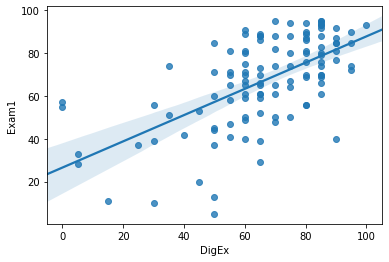

In [35]:
sns.regplot('DigEx', 'Exam1', data=proj_pd)
plt.show()

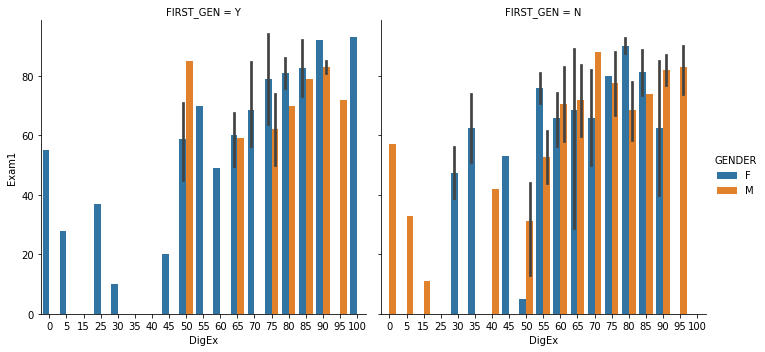

In [39]:
sns.catplot('DigEx', 'Exam1', hue='GENDER', col='FIRST_GEN', data=proj_pd, kind='bar')
plt.show()

In [15]:
#### LOAD PACKAGES 
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

%matplotlib inline

In [23]:
tstat, pval = stats.ttest_ind(proj_pd.Exam1, proj_pd.DigEx)
print(pval)

0.7244408665866546


In [14]:
proj_pd['SUM']= proj.Exam1 + proj.DigEx + proj.Mod1.astype(np.int8)

In [27]:
proj_pd['Average'] = proj_pd.SUM/210


In [ ]:
proj_pd['Predict']= np.where(proj_pd.SUM==80, proj_pd.Average*2).astype(np.int16)

In [29]:
proj_pd

,Code,GENDER,ETHNICITY,FIRST_GEN,HOME_CITY,HOME_STATE,PELL_IND,TD_IND,FERPA_FLG,PRIMARY_PROGRAM,...,ACT_SCORE,HS_CONV_GPA,STEM_CRSE_COUNT_TERM,STEM_CRSE_COUNT_TOTAL,Exam1,DigEx,Mod1,Subject Enhancement Project,SUM,Average
0,100,F,2+ Races,Y,Seekonk,MA,N,N,N,UC_PH,...,0,3.1,3,3,48.0,70,5.0,50,123.0,0.585714
1,101,M,2+ Races,Y,Exeter,RI,Y,N,N,UC_EL,...,0,NaN,1,1,50.0,75,6.0,50,131.0,0.623810
2,102,M,2+ Races,N,Pawtucket,RI,Y,Y,N,UC_AS,...,0,NaN,1,1,13.0,50,0.0,0,63.0,0.300000
3,103,F,2+ Races,Y,Cranston,RI,N,N,N,UC_EL,...,0,4.1,2,2,92.0,90,12.0,50,194.0,0.923810
4,104,M,2+ Races,N,Holbrook,NY,N,N,N,UC_EL,...,0,NaN,2,2,40.0,60,0.0,0,100.0,0.476190
6,106,F,2+ Races,N,Warwick,RI,Y,N,N,UC_EL,...,0,3.1,2,5,61.0,85,9.0,50,155.0,0.738095
7,107,F,2+ Races,Y,Pembroke,MA,N,N,N,UC_EL,...,27,3.4,2,2,94.0,75,12.0,50,181.0,0.861905
8,108,F,2+ Races,Y,Pawtucket,RI,Y,N,N,UC_CH,...,0,NaN,1,2,45.0,50,5.0,0,100.0,0.476190
9,109,M,2+ Races,N,Riverside,RI,N,N,N,UC_EL,...,0,2.7,2,2,47.0,55,9.0,0,111.0,0.528571
10,110,F,Asian,N,Providence,RI,Y,N,N,AS,...,0,3.7,2,3,94.0,80,12.0,50,186.0,0.885714


2) Run the following cell.

In [30]:
import seaborn as sns
sns.__version__

'0.9.0'

#### Submitting

In the Terminal (Mac) or Git Bash (Windows):

`git commit -a -m 'Assignment 7 completed'`  
`git push`

### Reading

1. [_Python for Data Analysis_](https://uri-primo.hosted.exlibrisgroup.com/permalink/f/10nopmq/01URI_ALMA51209454630002396):
    * Chapter 9